In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.wine.Wine_Quality_Data import get_wine_dataset
import common_grid_search_analysis

import numpy as np
import pandas  as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import joblib

PLOT_PREFIX = "Figures/DECISION_TREE_TEST_"
GLOBAL_FIG_COUNTER = 0

GS_FILE_NAME_PREFIX = "Analysis_Data/WINE_DECISION_TREE"

In [2]:
# Load Data
import DecisionTrees.common_decision_tree as common_decision_tree
X_train, X_test, y_train, y_test = get_wine_dataset()
num_features = X_train.shape[1]

In [3]:
# Start with Learning Curve on Default Classifier
import TrainingCurves
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(tree.DecisionTreeClassifier(criterion='entropy'), X_train, y_train, "balanced_accuracy")

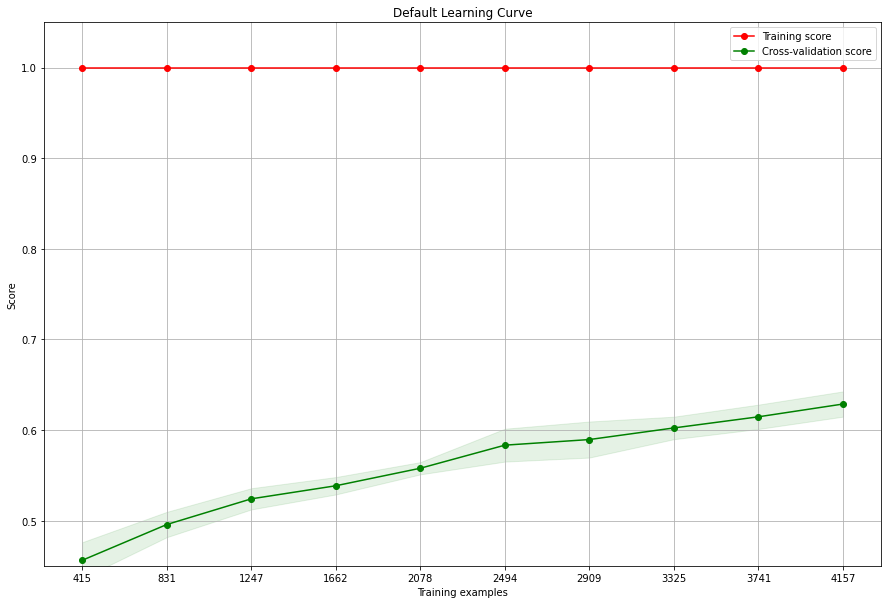

In [4]:
ylim=(0.45, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)


In [9]:
ccp_alpha = np.arange(0.0, 0.005, 0.0001)

criterion = ['gini', 'entropy']
min_samples_split = [i for i in range(2, 200, 5)]
min_samples_leaf = [i for i in range(1, 200, 5)]
max_depth = [i for i in range(1, 50, 2)]
num_features = X_train.shape[1]
max_features = [i for i in range(num_features+1)]

parameters = {'ccp_alpha': ccp_alpha, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split, 'max_depth': max_depth}
parameters = {'ccp_alpha': ccp_alpha, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split}

default_parameters = {'criterion': 'gini', 'max_features': num_features//2, 'max_depth': 17}
gs = common_decision_tree.perform_grid_search(parameters, X_train, y_train, scoring='balanced_accuracy', GS_FILE_NAME_PREFIX=GS_FILE_NAME_PREFIX, default_parameters=default_parameters)

gs_results = gs

Grid Search Will be Saved to  Analysis_Data/WINE_DECISION_TREE_ccp_alpha_0.0-0.0049_min_samples_leaf_1-196_min_samples_split_2-197.pickle
Fitting 5 folds for each of 80000 candidates, totalling 400000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0358s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1401s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1654s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 67200 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 68248 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 69296 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 70360 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 71424 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 72504 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 73584 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 74680 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 75776 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 76888 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 78000 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 79128 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 80256 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 81400 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 82544 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 83704 tasks 

[Parallel(n_jobs=-1)]: Done 263800 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 265856 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 267928 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 270000 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 272088 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 274176 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 276280 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 278384 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 280504 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 282624 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 284760 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 286896 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 289048 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 291200 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 293368 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Do

Saved  Analysis_Data/WINE_DECISION_TREE_ccp_alpha_0.0-0.0049_min_samples_leaf_1-196_min_samples_split_2-197.pickle


Plot saved as:  Figures/DECISION_TREE_TEST_GS_ModelComplexity_ccp_alpha_min_samples_leaf_min_samples_split.png
Plot saved as:  Figures/DECISION_TREE_TEST_GS_Times_ccp_alpha_min_samples_leaf_min_samples_split.png


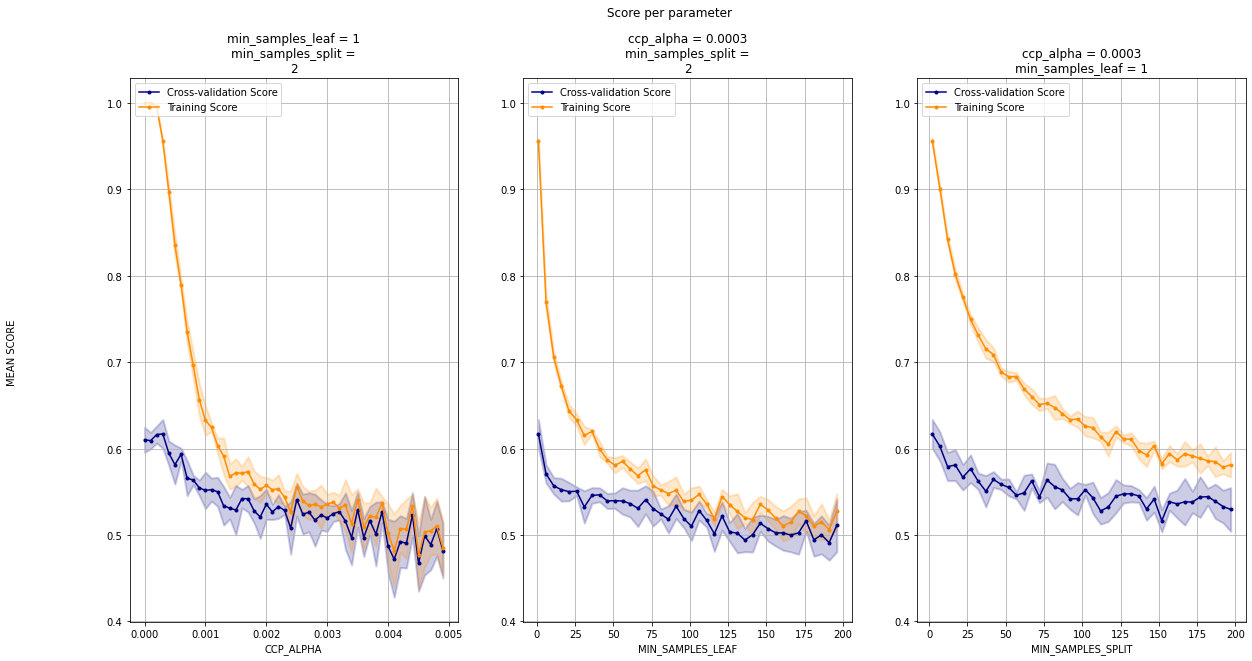

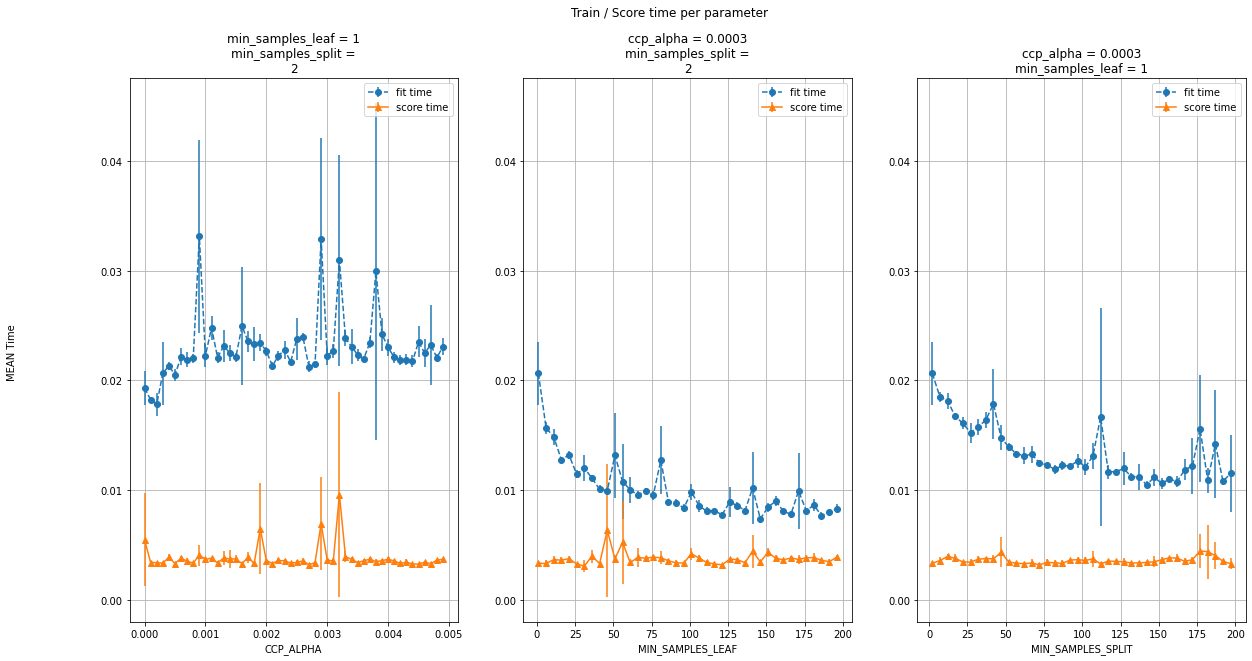

In [10]:
unused_params_values = {'max_depth': 100, 'min_samples_leaf': 31, 'min_samples_split': 36, 'ccp_alpha': 0}

common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_PREFIX=PLOT_PREFIX)


common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_PREFIX=PLOT_PREFIX)


Plot saved as:  Figures/DECISION_TREE_TEST_GridScore_max_depth_max_features_1.png


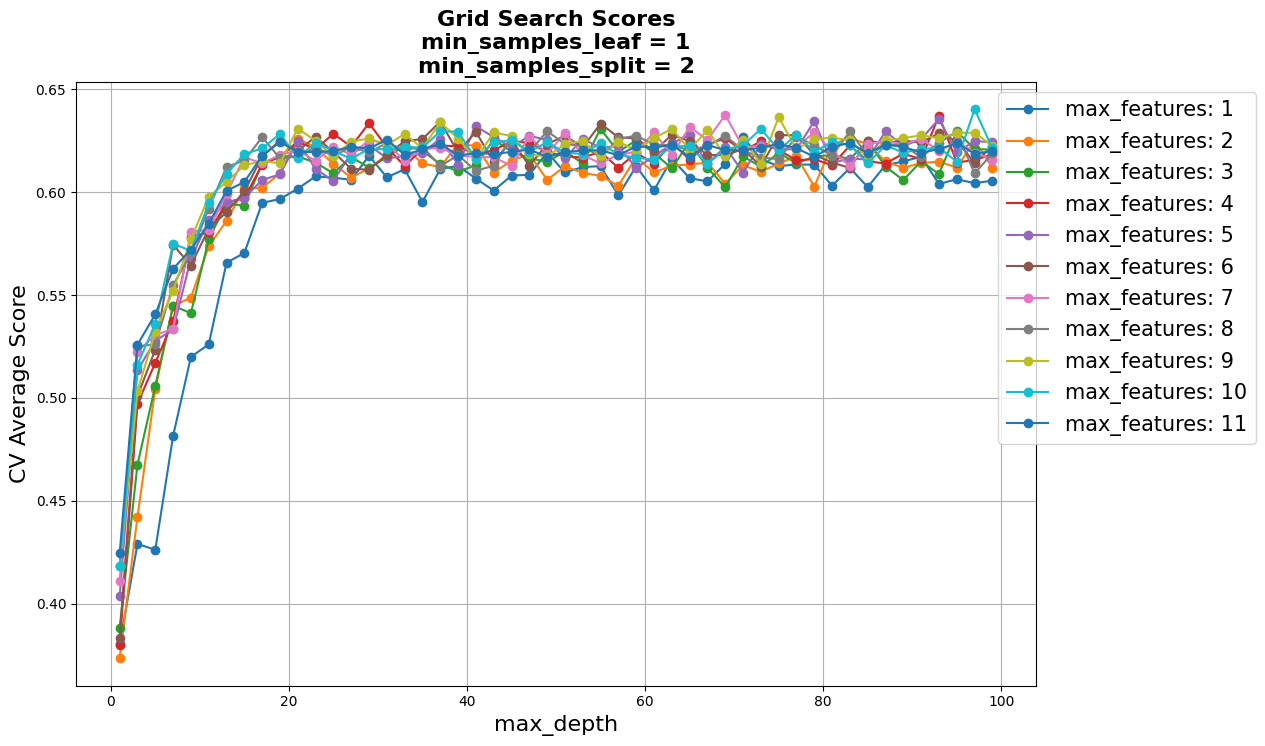

In [30]:
mean_score_limit=0.55
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'ccp_alpha', 'min_', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

Plot saved as:  Figures/DECISION_TREE_TEST_GridScore_ccp_alpha_min_samples_leaf_6.png
Plot saved as:  Figures/DECISION_TREE_TEST_GridScore_ccp_alpha_min_samples_split_7.png
Plot saved as:  Figures/DECISION_TREE_TEST_GridScore_min_samples_split_min_samples_leaf_8.png


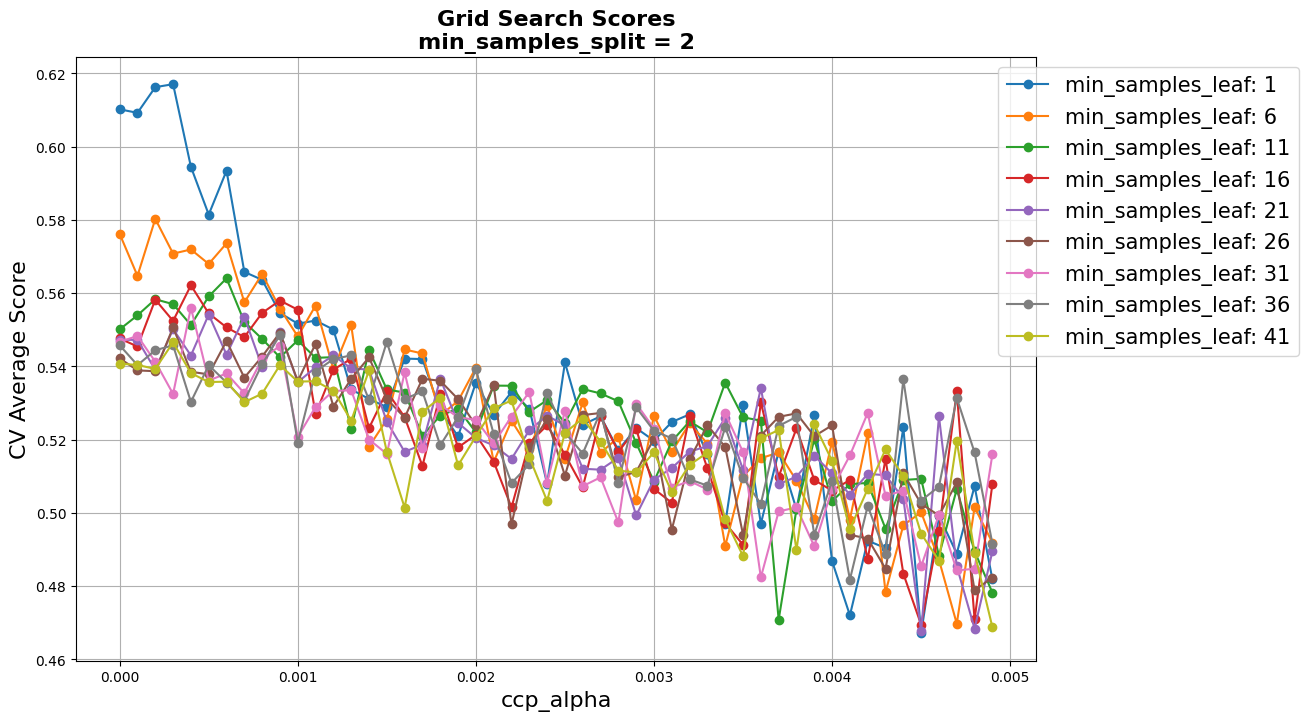

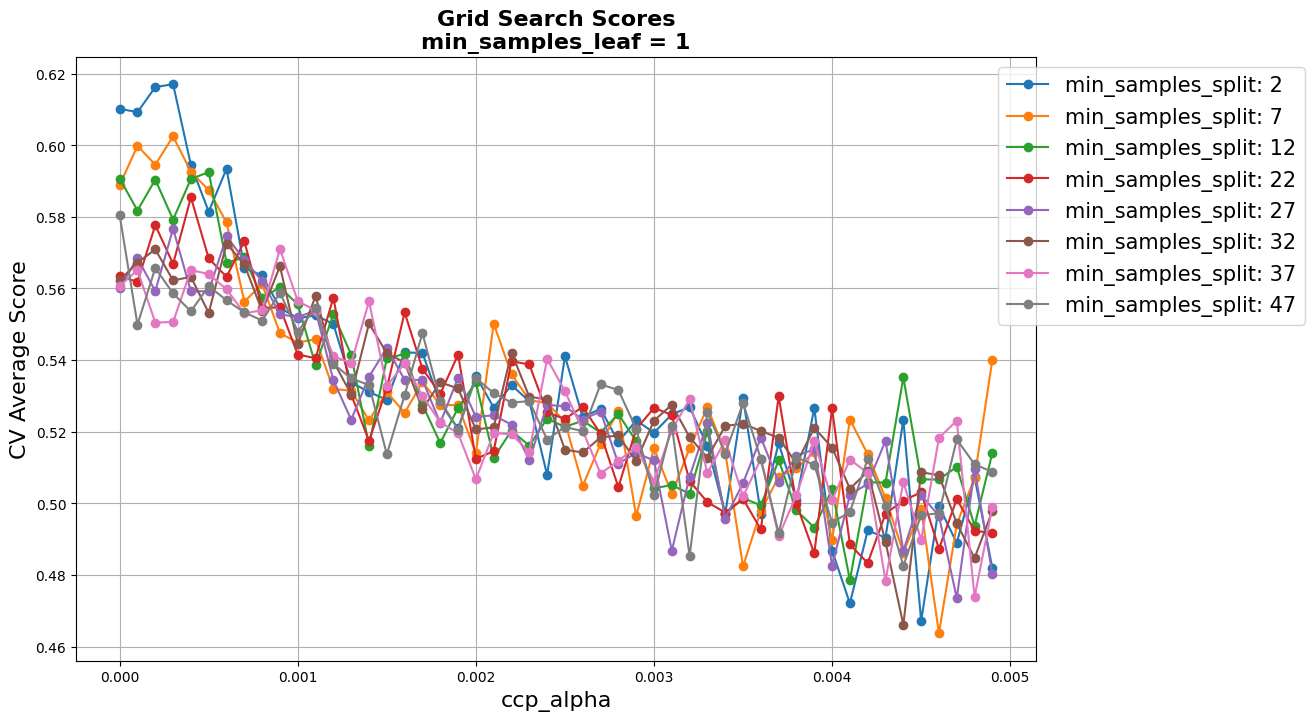

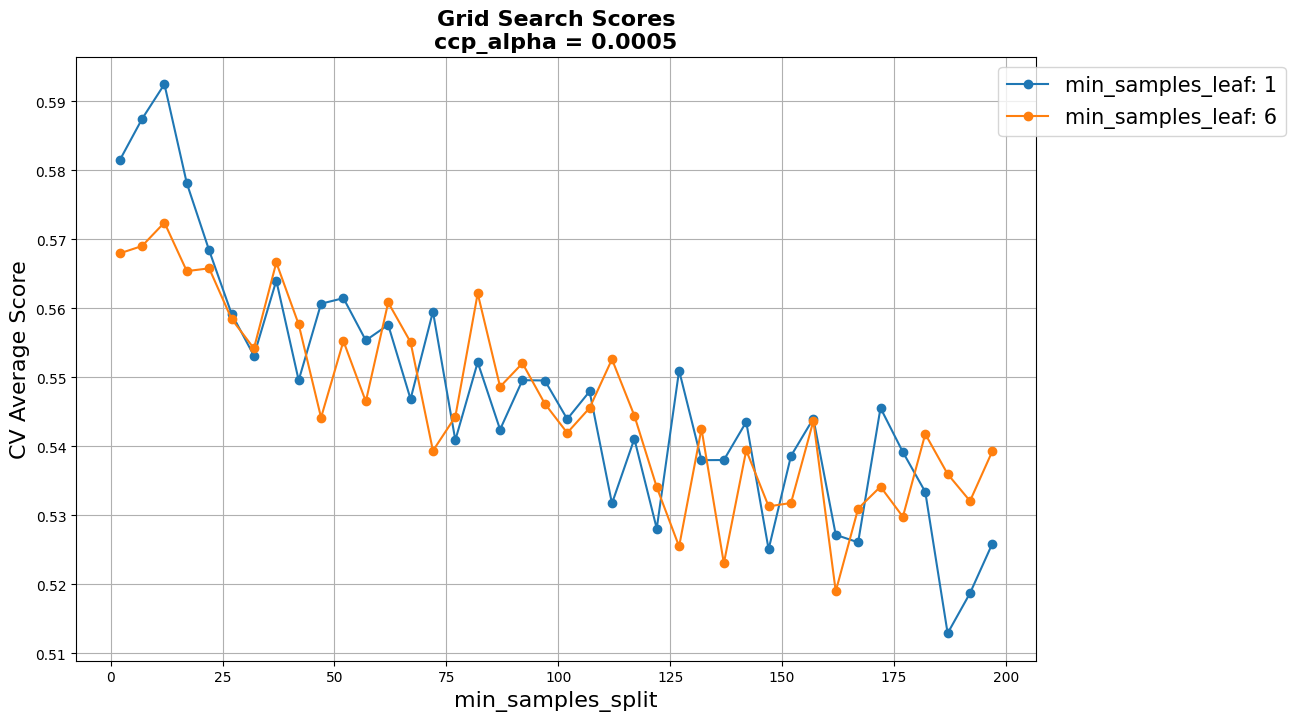

In [15]:
mean_score_limit=0.54
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'ccp_alpha', 'min_samples_leaf', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1
mean_score_limit=0.56
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'ccp_alpha', 'min_samples_split', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1
unused_params_value_dict={'ccp_alpha': 0.0005}
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'min_samples_split', 'min_samples_leaf', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER, unused_params_value_dict=unused_params_value_dict)


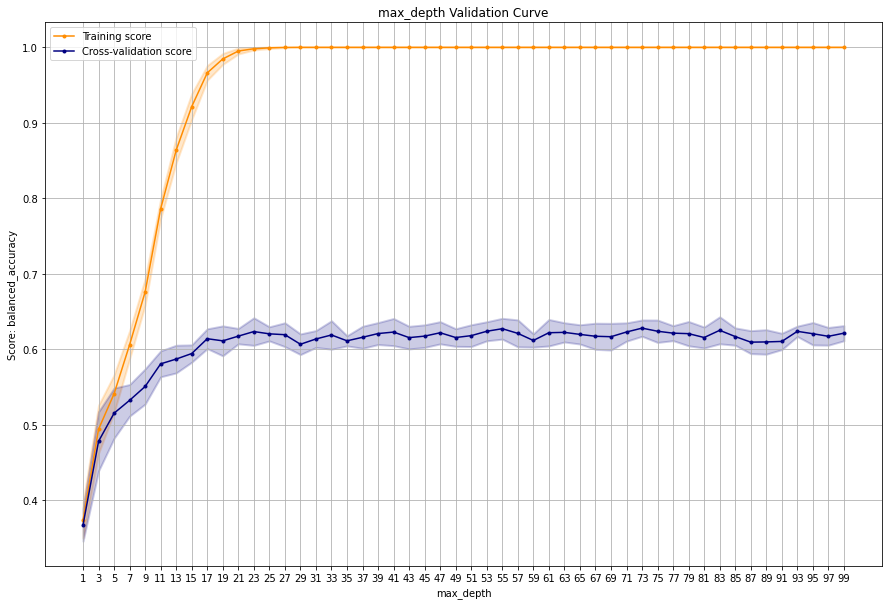

In [11]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(max_features=3), X_train, y_train, "max_depth", max_depth, 'balanced_accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_depth", max_depth, title="max_depth Validation Curve", scoring="balanced_accuracy", tick_spacing=1)


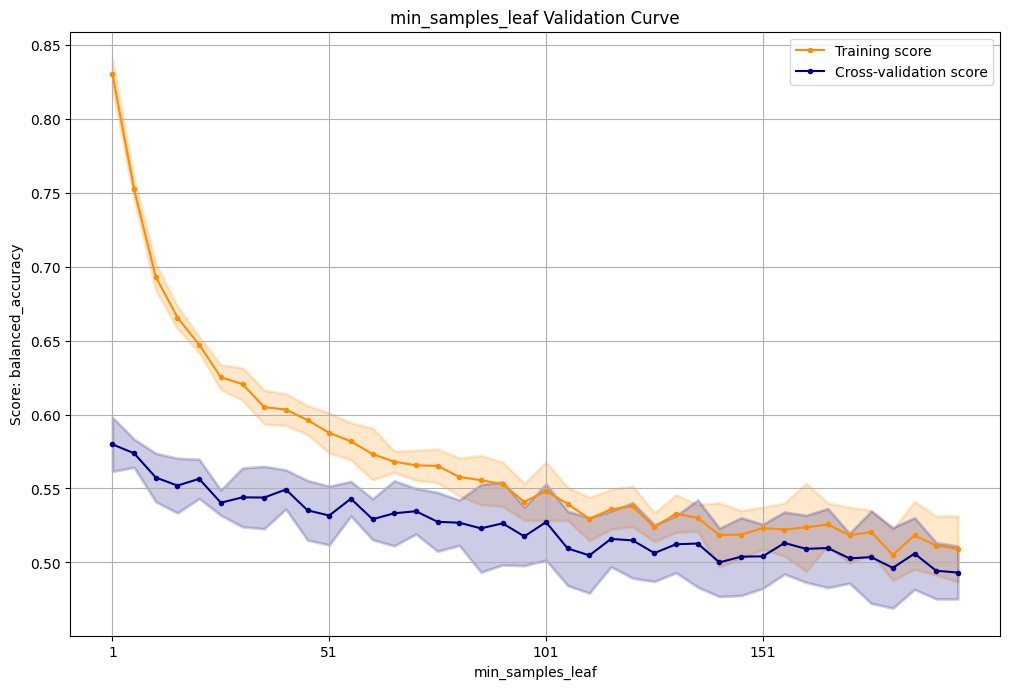

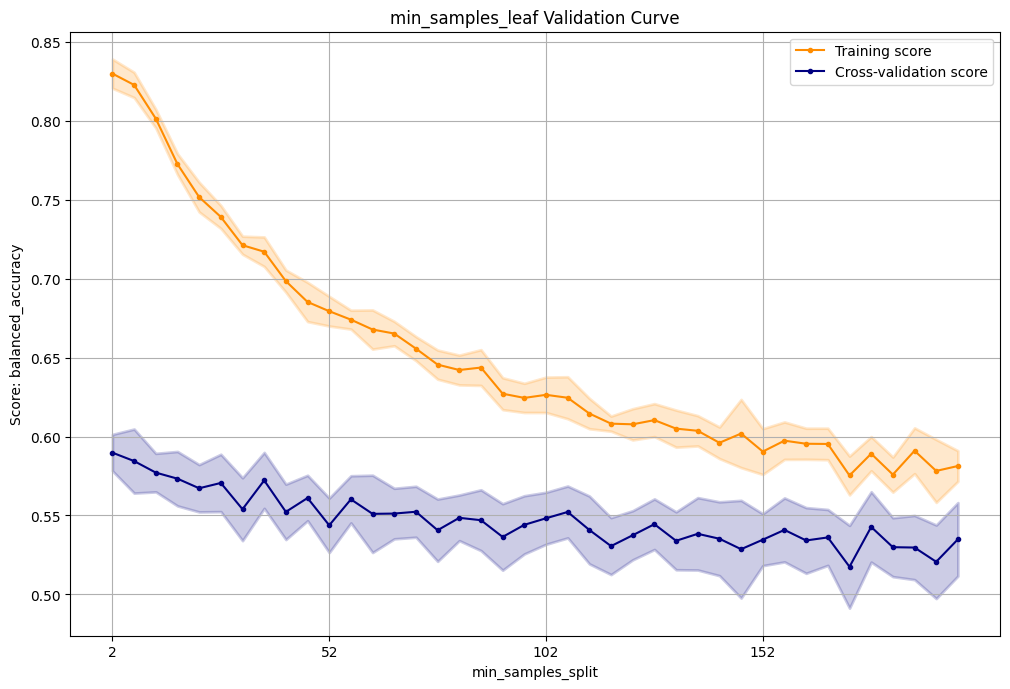

In [16]:
test_parameters = {'criterion': 'gini', 'max_features': num_features//2, 'max_depth': 17, 'ccp_alpha': 0.0005}
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(**test_parameters), X_train, y_train, "min_samples_leaf", min_samples_leaf, 'balanced_accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "min_samples_leaf", min_samples_leaf, title="min_samples_leaf Validation Curve", scoring="balanced_accuracy", tick_spacing=10)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(**test_parameters), X_train, y_train, "min_samples_split", min_samples_split, 'balanced_accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "min_samples_split", min_samples_split, title="min_samples_leaf Validation Curve", scoring="balanced_accuracy", tick_spacing=10)


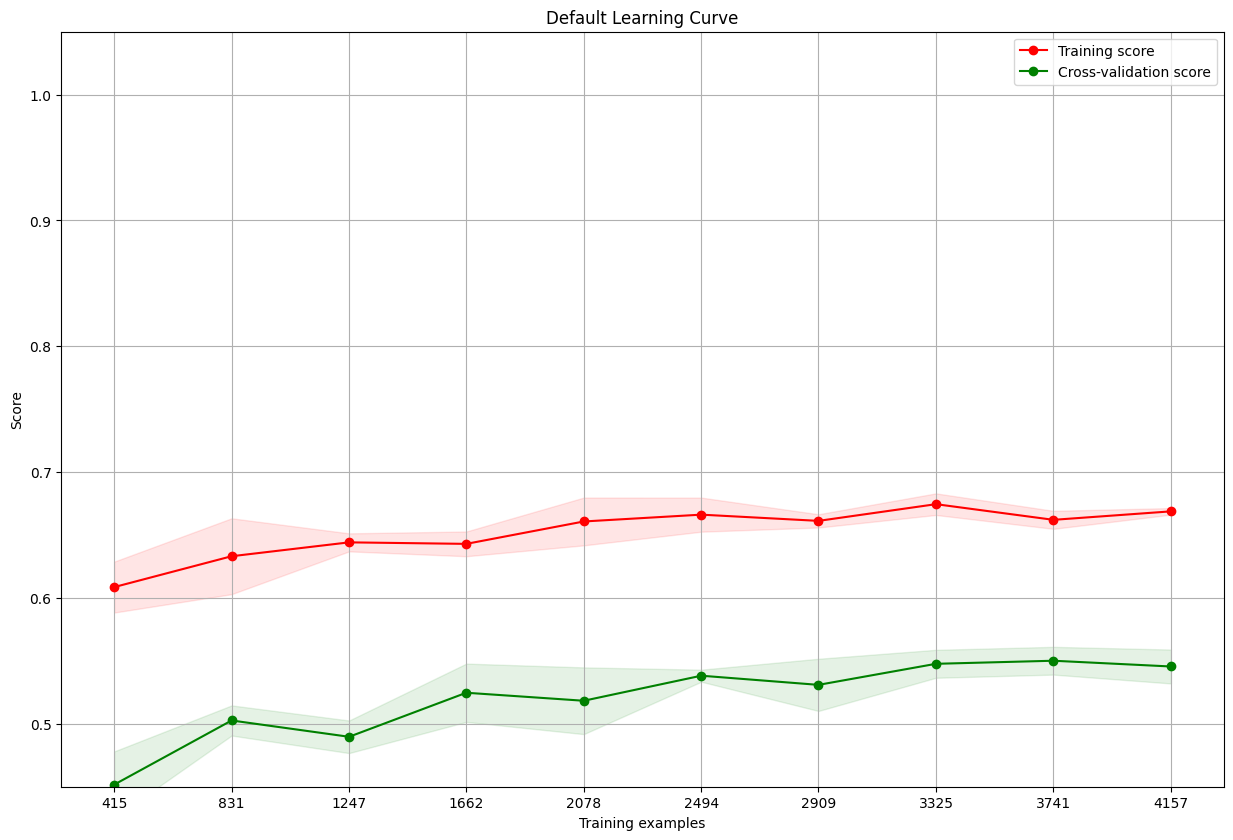

In [19]:
test_parameters = {'criterion': 'gini', 'max_features': num_features//2, 'max_depth': 17, 'ccp_alpha': 0.0004, 'min_samples_split': 50, 'min_samples_leaf': 6}
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(tree.DecisionTreeClassifier(**test_parameters), X_train, y_train, "balanced_accuracy")
ylim=(0.45, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)


In [14]:
parameters = {'max_depth': max_depth, 'ccp_alpha': ccp_alpha}

gs = common_decision_tree.perform_grid_search(parameters, X_train, y_train, scoring='balanced_accuracy', GS_FILE_NAME_PREFIX=GS_FILE_NAME_PREFIX)

gs_results = gs

Grid Search Will be Saved to  Analysis_Data/WINE_DECISION_TREE_max_depth_1-99_ccp_alpha_0.0-0.0099.pickle
Fitting 5 folds for each of 5000 candidates, totalling 25000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0196s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1476s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 436 tasks      | elapsed:    2.8s
[Parallel(n_jo

Saved  Analysis_Data/WINE_DECISION_TREE_max_depth_1-99_ccp_alpha_0.0-0.0099.pickle


[Parallel(n_jobs=-1)]: Done 25000 out of 25000 | elapsed:  2.5min finished


Plot saved as:  Figures/DECISION_TREE_TEST_GS_ModelComplexity_ccp_alpha_max_depth.png
Plot saved as:  Figures/DECISION_TREE_TEST_GS_Times_ccp_alpha_max_depth.png


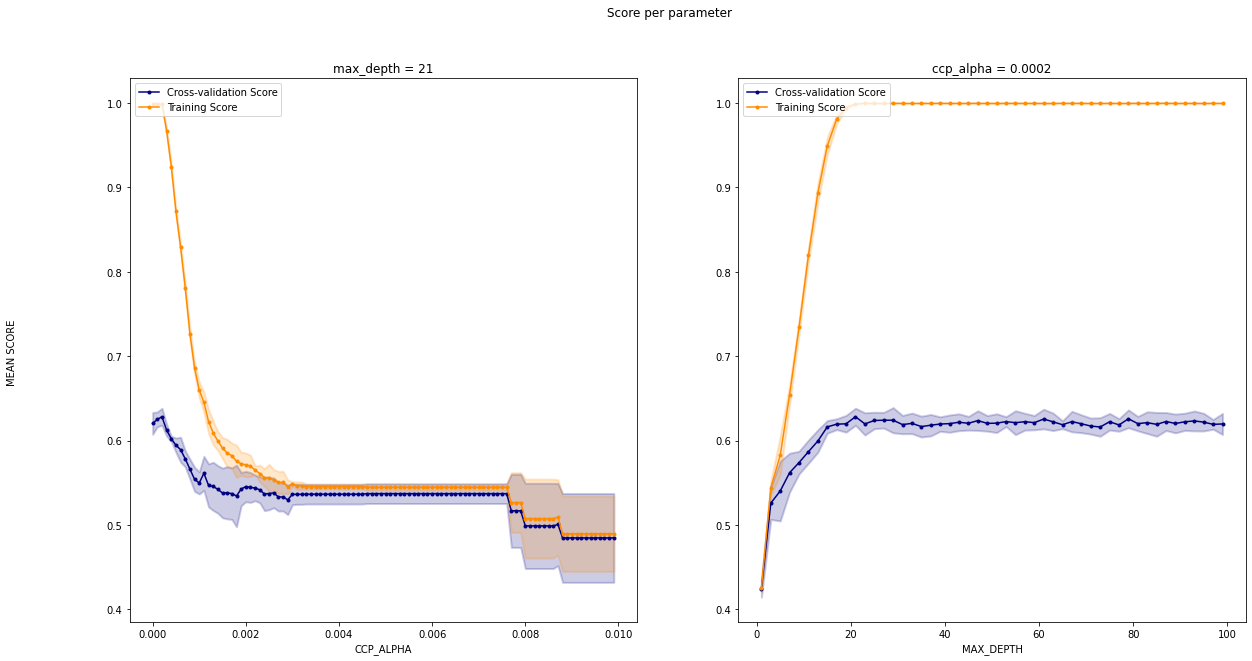

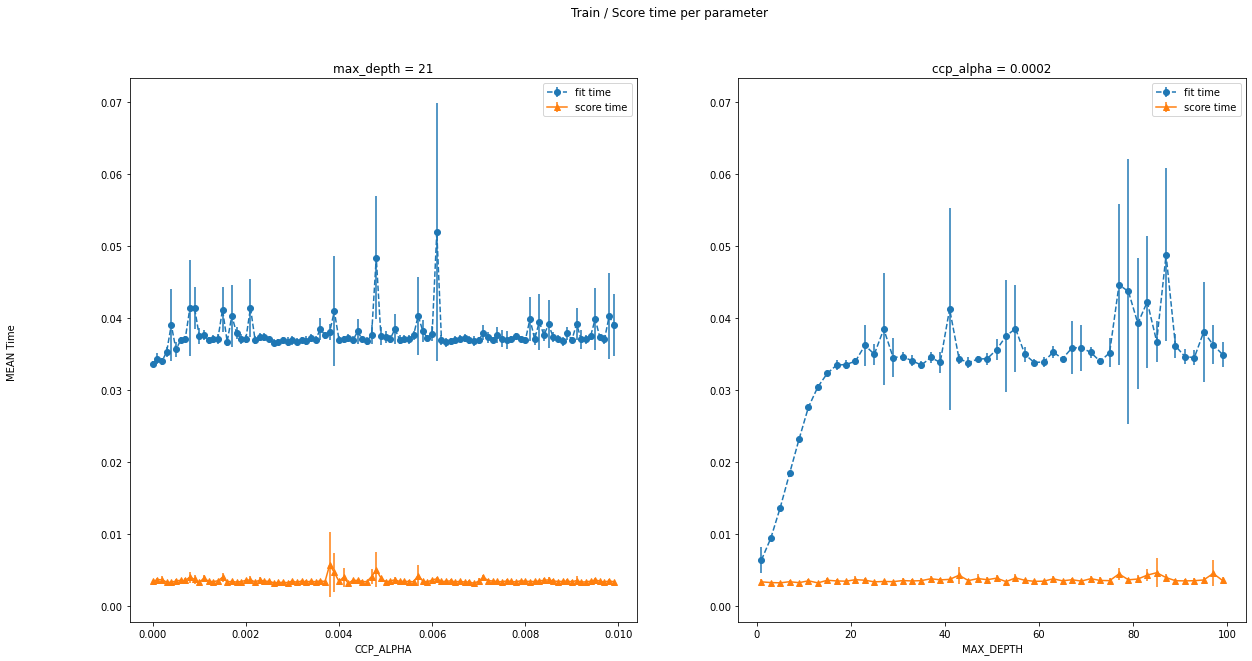

In [15]:
common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_PREFIX=PLOT_PREFIX)
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_PREFIX=PLOT_PREFIX)

Plot saved as:  Figures/DECISION_TREE_TEST_GridScore_max_depth_ccp_alpha_0.png


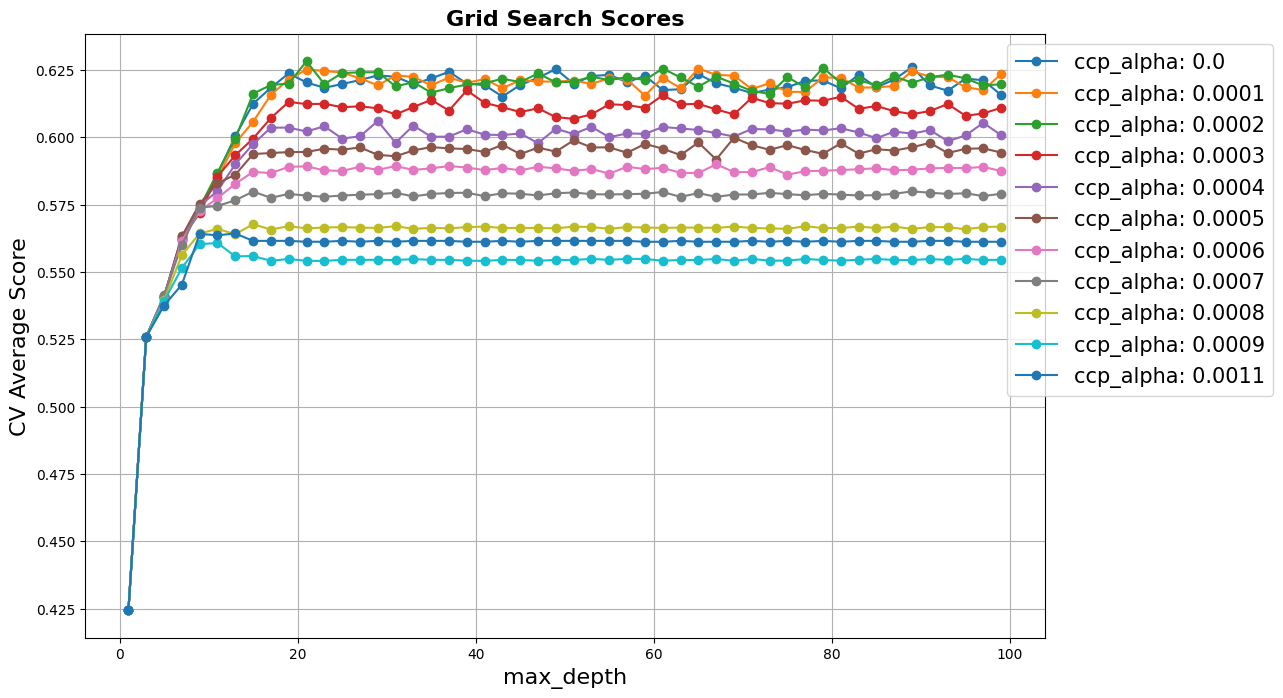

In [16]:
mean_score_limit=0.59

mean_score_limit=0.55
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'max_depth', 'ccp_alpha', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1


Plot saved as:  Figures/DECISION_TREE_TEST_GridScore_max_depth_min_samples_split_10.png


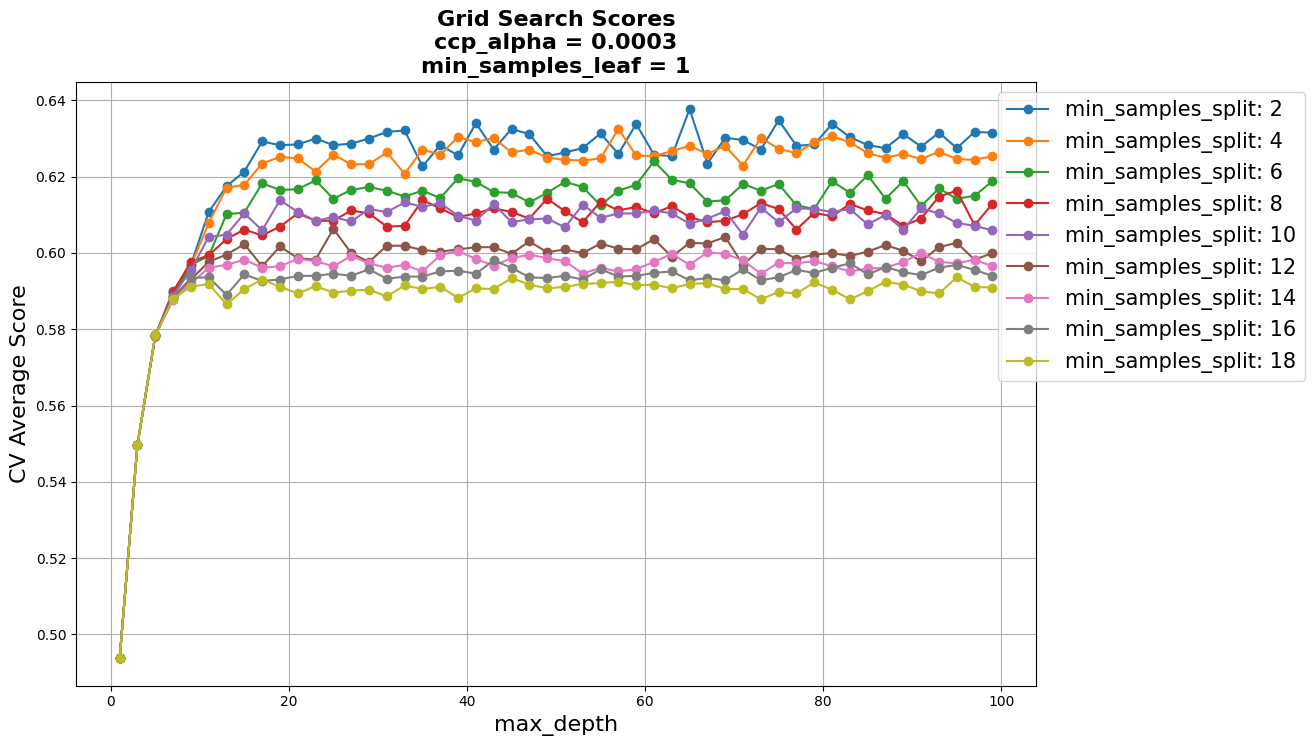

In [23]:
plot_grid_search(gs_results.cv_results_, 'max_depth', 'min_samples_split', mean_score_limit)

Plot saved as:  Figures/DECISION_TREE_TEST_GridScore_max_depth_min_samples_leaf_11.png


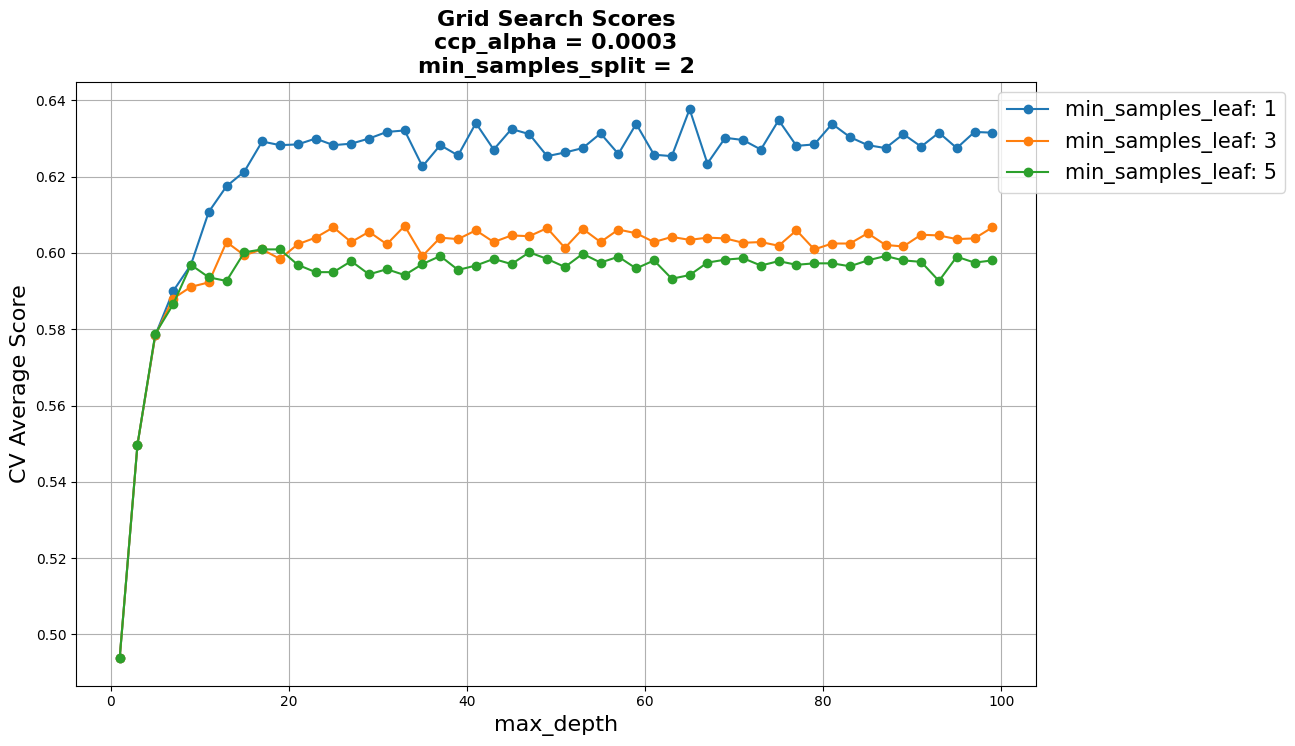

In [24]:
plot_grid_search(gs_results.cv_results_, 'max_depth', 'min_samples_leaf', mean_score_limit)

Plot saved as:  Figures/DECISION_TREE_TEST_GridScore_min_samples_leaf_min_samples_split_12.png


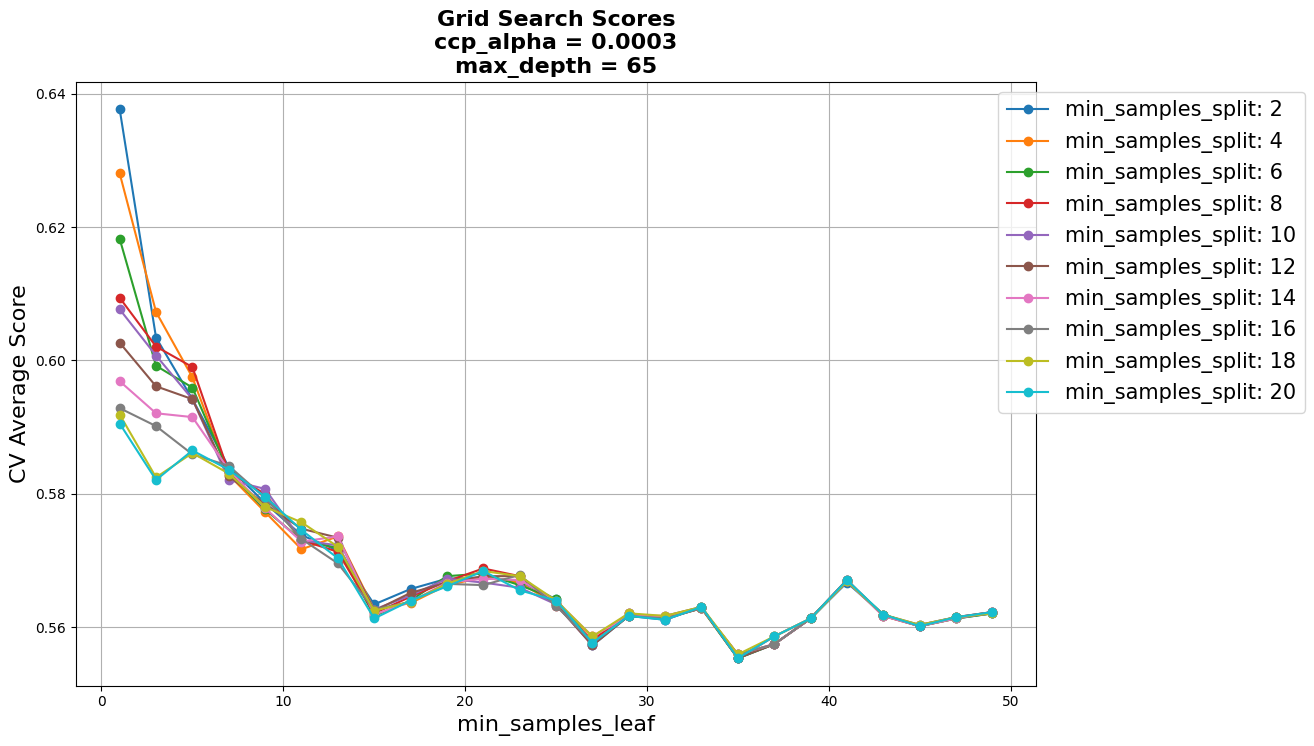

In [25]:
plot_grid_search(gs_results.cv_results_, 'min_samples_leaf', 'min_samples_split',mean_score_limit)

Plot saved as:  Figures/DECISION_TREE_TEST_GridScore_max_depth_ccp_alpha_13.png


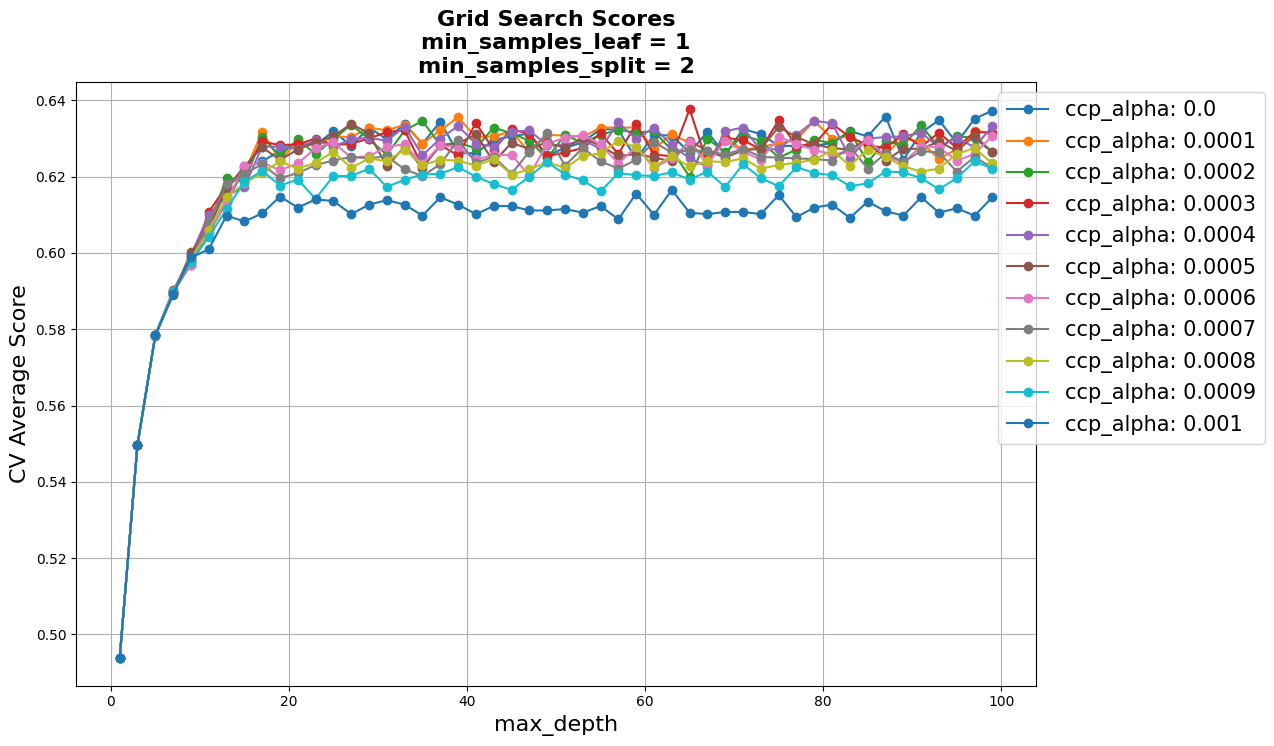

In [26]:
mean_score_limit=0.61
plot_grid_search(gs_results.cv_results_, 'max_depth', 'ccp_alpha',mean_score_limit)

In [32]:
print(gs.best_params_)
print(gs.cv_results_['params'][0].keys())

name_param_1 = 'min_samples_split'
name_param_2 = 'ccp_alpha'
unused_params = {}


for i in gs.cv_results_['params'][0].keys():
    if i != name_param_2 and i != name_param_1:
        unused_params[i] = gs.best_params_[i]
print(unused_params)

{'ccp_alpha': 0.00030000000000000003, 'min_samples_leaf': 1, 'min_samples_split': 2}
dict_keys(['ccp_alpha', 'min_samples_leaf', 'min_samples_split'])
{'min_samples_leaf': 1}


0.633 (+/-0.024) for {'ccp_alpha': 0.00030000000000000003, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.632 (+/-0.041) for {'ccp_alpha': 0.0001, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.630 (+/-0.033) for {'ccp_alpha': 0.0005, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.628 (+/-0.036) for {'ccp_alpha': 0.0002, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.627 (+/-0.038) for {'ccp_alpha': 0.0001, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.627 (+/-0.024) for {'ccp_alpha': 0.0004, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.627 (+/-0.037) for {'ccp_alpha': 0.0005, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.627 (+/-0.027) for {'ccp_alpha': 0.0008, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.627 (+/-0.034) for {'ccp_alpha': 0.0007, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.627 (+/-0.023) for {'ccp_alpha': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.627 (+/-0.043) for {'ccp_alpha': 0.0004, 'min_samples_leaf': 1, 'min_samples_split': 

KeyError: 'max_features'

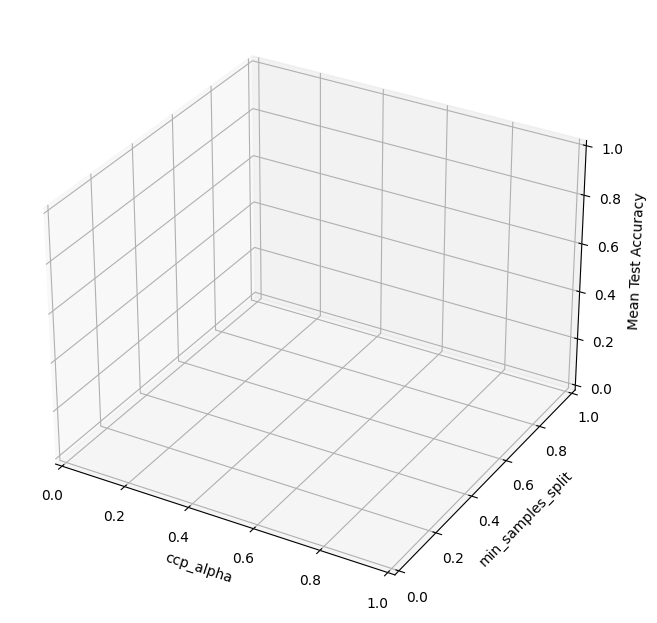

In [33]:
means = gs_results.cv_results_['mean_test_score']
stds = gs_results.cv_results_['std_test_score']
parameters = gs_results.cv_results_['params'][0].keys()
parameter_dict = {}
for param in parameters:
    parameter_dict[param] = []

plot_mean = []
for i in np.argsort(means)[::-1][0:100]:
    mean = means[i]
    std = stds[i]
    params = gs_results.cv_results_['params'][i]
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
    plot_mean.append(mean)
    for key, value in params.items():
        parameter_dict[key].append(value)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = parameter_dict['ccp_alpha']
y = parameter_dict['min_samples_split']
z = plot_mean

ax.set_xlabel("ccp_alpha")
ax.set_ylabel("min_samples_split")
ax.set_zlabel("Mean Test Accuracy")

max_features_map = {"auto": 0, "sqrt": 1, "log2": 2}
max_feature_plot = [max_features_map[i] for i in parameter_dict["max_features"]]

sc = ax.scatter(x, y, z, c=max_feature_plot)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [8]:
results = pd.DataFrame(gs_results.cv_results_)
results = results.sort_values(by=['rank_test_score'])
for param in results['params'][0].keys():
    print([i for i in results['params']])
    values = [i[param] for i in results['params']]
    results.insert(0, param, values)
results

[{'ccp_alpha': 0.0006000000000000001, 'max_features': 'auto', 'min_samples_split': 32}, {'ccp_alpha': 0.0008, 'max_features': 'auto', 'min_samples_split': 8}, {'ccp_alpha': 0.0009000000000000001, 'max_features': 'auto', 'min_samples_split': 22}, {'ccp_alpha': 0.0007, 'max_features': 'sqrt', 'min_samples_split': 20}, {'ccp_alpha': 0.0006000000000000001, 'max_features': 'sqrt', 'min_samples_split': 36}, {'ccp_alpha': 0.0008, 'max_features': 'auto', 'min_samples_split': 12}, {'ccp_alpha': 0.0004, 'max_features': 'sqrt', 'min_samples_split': 2}, {'ccp_alpha': 0.0008, 'max_features': 'auto', 'min_samples_split': 32}, {'ccp_alpha': 0.0009000000000000001, 'max_features': 'auto', 'min_samples_split': 44}, {'ccp_alpha': 0.001, 'max_features': 'sqrt', 'min_samples_split': 42}, {'ccp_alpha': 0.0006000000000000001, 'max_features': 'auto', 'min_samples_split': 2}, {'ccp_alpha': 0.0007, 'max_features': 'sqrt', 'min_samples_split': 4}, {'ccp_alpha': 0.001, 'max_features': 'sqrt', 'min_samples_split':

min_samples_split max_features  ccp_alpha  mean_fit_time  std_fit_time  \
447                  32         auto     0.0006       0.087081      0.004534   
579                   8         auto     0.0008       0.092153      0.003414   
658                  22         auto     0.0009       0.094876      0.007422   
537                  20         sqrt     0.0007       0.086667      0.000755   
473                  36         sqrt     0.0006       0.082023      0.001851   
...                 ...          ...        ...            ...           ...   
6400                 34         log2     0.0088       0.054607      0.002000   
6233                 36         sqrt     0.0086       0.081371      0.004046   
6238                 46         sqrt     0.0086       0.080019      0.003383   
6181                 28         log2     0.0085       0.056654      0.002093   
5033                 36         log2     0.0069       0.066214      0.018814   

      mean_score_time  std_score_time param_ccp_alpha param_max_features  \
447          0.001024        0.000079          0.0006               auto   
579          0.001395        0.000263          0.0008               auto   
658          0.001146        0.000205          0.0009               auto   
537          0.001236        0.000234          0.0007               sqrt   
473          0.001104        0.000204          0.0006               sqrt   
...               ...             ...             ...                ...   
6400         0.000887        0.000107          0.0088               log2   
6233         0.001132        0.000215          0.0086               sqrt   
6238         0.000877        0.000135          0.0086               sqrt   
6181         0.001098        0.000397          0.0085               log2   
5033         0.000889        0.000097          0.0069               log2   

     param_min_samples_split  ... mean_test_score  std_test_score  \
447                       32  ...        0.653125        0.014164   
579                        8  ...        0.645875        0.008791   
658                       22  ...        0.644875        0.008191   
537                       20  ...        0.644625        0.007033   
473                       36  ...        0.643125        0.007756   
...                      ...  ...             ...             ...   
6400                      34  ...        0.505000        0.000000   
6233                      36  ...        0.505000        0.000000   
6238                      46  ...        0.505000        0.000000   
6181                      28  ...        0.505000        0.000000   
5033                      36  ...        0.505000        0.000000   

      rank_test_score  split0_train_score  split1_train_score  \
447                 1            0.797188            0.792969   
579                 2            0.761406            0.750313   
658                 3            0.732031            0.713125   
537                 4            0.784531            0.773906   
473                 5            0.793125            0.793125   
...               ...                 ...                 ...   
6400             7087            0.505000            0.505000   
6233             7087            0.505000            0.505000   
6238             7087            0.505000            0.505000   
6181             7087            0.505000            0.505000   
5033             7087            0.505000            0.505000   

      split2_train_score  split3_train_score  split4_train_score  \
447             0.795937            0.802031            0.790312   
579             0.753906            0.742188            0.757812   
658             0.735000            0.718594            0.742656   
537             0.790469            0.786406            0.774062   
473             0.782500            0.788438            0.783125   
...                  ...                 ...                 ...   
6400            0.505000            0.505000  